# Week4 - Homework

- Execute the below code, then answer the numbered questions.

In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [10]:
df

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0
...,...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0


In [11]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features] 
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [12]:
# insert code here
numerical_columns  = [column_name for column_name in X_train.columns if X_train[column_name].dtype!=object]
numerical_columns

['condition', 'odometer', 'auction_value']

In [13]:
Categorical_columns  = [column_name for column_name in X_train.columns if X_train[column_name].dtype==object]
Categorical_columns

['make', 'transmission', 'state']

## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [17]:
# checking for missing values in numrical columns
count_missing_values = df[numerical_columns].isnull().sum()
count_missing_values

condition        882
odometer         877
auction_value    948
dtype: int64

In [18]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipeline_mean_and_sd = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),#simple imputer helps in filling missing values with median 
    ('scaler', StandardScaler())# this line helps in standardizing values using a standard scalar
])
X_train_PL = pd.DataFrame(pipeline_m_sd.fit_transform(X_train[numerical_columns]))
X_train_PL 

,0,1,2
0,0.812041,-0.187630,-0.268271
1,0.684329,-0.479351,0.743492
2,-1.231354,0.861689,-0.740427
3,-0.209657,-0.553430,-0.389683
4,-0.592793,-0.003804,-0.544820
...,...,...,...
7239,0.173480,0.276634,-0.558310
7240,0.684329,-0.158238,0.244355
7241,0.556616,-0.002603,-0.544820
7242,-0.337369,0.433915,-0.841604


In [21]:
# checking for missing values in numrical columns after using pipeline
count_missing_values_after_Mean_and_SD = X_train_PL.isnull().sum()
count_missing_values_after_Mean_and_SD

0    0
1    0
2    0
dtype: int64

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [43]:
from sklearn.preprocessing import OneHotEncoder
pipeline_Categorical_data = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),# using simple imputer for filling missing values with most_frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))#using one_hot_encoder for converting categorical data into numeric data.
])
X_train_Catgorical_data = pipeline_Categorical_data.fit_transform(X_train[Categorical_columns])
data_ = pd.DataFrame(X_train_Catgorical_data.toarray())
data_

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7240,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7242,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [44]:
# insert code here
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline_mean_and_sd,numerical_columns),#numerical data
        ('cat', pipeline_Categorical_data,Categorical_columns)#categorical data
    ])
processed_data = preprocessor.fit_transform(X_train)
processed_data_array = pd.DataFrame(processed_data.toarray())
processed_data_array

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.812041,-0.187630,-0.268271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.684329,-0.479351,0.743492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.231354,0.861689,-0.740427,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.209657,-0.553430,-0.389683,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.592793,-0.003804,-0.544820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.173480,0.276634,-0.558310,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7240,0.684329,-0.158238,0.244355,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7241,0.556616,-0.002603,-0.544820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7242,-0.337369,0.433915,-0.841604,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [30]:
from sklearn.linear_model import LinearRegression
pipeline = Pipeline([('preprocessor', preprocessor),('m',LinearRegression())])# added a linear regression model to a pipeline
pipeline.fit(X_train,y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='

In [31]:
from sklearn.metrics import r2_score
y_predictions = pipeline.predict(X_test)
r2 = r2_score(y_test, y_predictions)# pedicting r2 score
r2

0.8838274418539929

## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

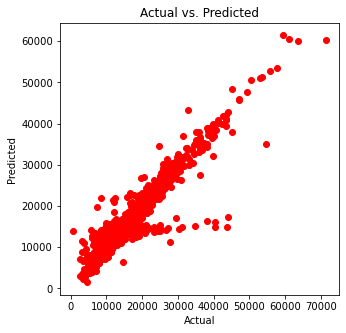

In [36]:
# insert code here 
from matplotlib import pyplot as plt
resid = y_test - y_predictions
plt.figure(figsize=(5,5))
plt.plot(y_test, y_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

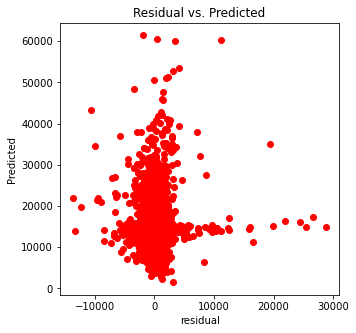

In [37]:
plt.figure(figsize=(5,5))
plt.plot(resid, y_predictions, 'ro')
plt.xlabel('residual')
plt.ylabel('Predicted')
plt.title('Residual vs. Predicted')
plt.show()

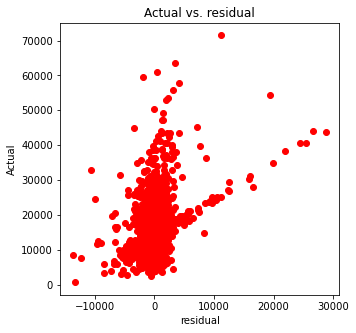

In [38]:
plt.figure(figsize=(5,5))
plt.plot(resid, y_test, 'ro')
plt.xlabel('residual')
plt.ylabel('Actual')
plt.title('Actual vs. residual')
plt.show()

Some of the actual values ranging from (20000 to 45000) are got predicted in the range (10000 to 20000) by observing this we can say that model is neglecting  to pick up some values which are in range from 20000 - 45000

## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
pipeline_ridge = Pipeline([('preprocessor', preprocessor),('regressor', Ridge(alpha=100))])# alpha value of 100
pipeline_ridge.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['condition', 'odometer',
                                                   'auction_value']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='

In [42]:
from sklearn.metrics import r2_score
y_predictions_ridge = pipeline_ridge.predict(X_test)
r2 = r2_score(y_test, y_predictions_ridge)
r2

0.8839136041023536

there is change of .002 in r2 value compared to linear regression(alpha ==0) when we have alpha value as 100 